In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # Create a trainable weight variable for the centers of the RBFs
        self.centers = self.add_weight(name='centers',
                                      shape=(self.units, input_shape[-1]),
                                      initializer='uniform',
                                      trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Calculate the radial basis functions for each input sample and each RBF center
        diff = K.expand_dims(inputs) - self.centers  # shape: (batch_size, units, input_dim)
        norm = K.sum(K.square(diff), axis=-1)  # shape: (batch_size, units)
        rbf = K.exp(-self.gamma * norm)  # shape: (batch_size, units)

        return rbf

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

In [9]:
def training_modelacc(filename):
    # load data
    df = pd.read_csv(filename, delimiter=',')
    # input and output
    X = df.drop(columns=["SHOT","GOAL","7MSHOT","6MSHOT","9MSHOT","WINGSHOT","PIVOTSHOT","FASTBREAKSHOT"])
    y = df.GOAL
    # dataset splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # dataset normalization
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # create the model
    model = Sequential()
    model.add(Flatten(input_shape=(6,)))  # Adjust the input shape to (12,)
    model.add(RBFLayer(6, 0.5))
    model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression
    model.compile(optimizer='rmsprop', loss=mean_squared_error)  # Use mean_squared_error for regression
    # train model
    model.fit(X_train, y_train, batch_size=8, epochs=100)
    # data prediction
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14);
    plt.show()
    return model
def training_modelshot(filename):
    # load data
    df = pd.read_csv(filename, delimiter=',')
    # input and output
    X = df.drop(columns=["SHOT","GOAL","7MACC","6MACC","9MACC","WINGACC","PIVOTACC","FASTBREAKACC"])
    y = df.GOAL
    # dataset splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # dataset normalization
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # create the model
    model = Sequential()
    model.add(Flatten(input_shape=(6,)))  # Adjust the input shape to (12,)
    model.add(RBFLayer(6, 0.5))
    model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression
    model.compile(optimizer='rmsprop', loss=mean_squared_error)  # Use mean_squared_error for regression
    # train model
    model.fit(X_train, y_train, batch_size=8, epochs=100)
    # data prediction
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14);
    plt.show()
    return model

Position:  CB.csv
Epoch 1/100
98/98 [==============================] - 0s 1ms/step - loss: 29.9552
Epoch 2/100
98/98 [==============================] - 0s 1ms/step - loss: 23.8272
Epoch 3/100
98/98 [==============================] - 0s 1ms/step - loss: 18.7087
Epoch 4/100
98/98 [==============================] - 0s 1ms/step - loss: 14.6327
Epoch 5/100
98/98 [==============================] - 0s 1ms/step - loss: 11.6359
Epoch 6/100
98/98 [==============================] - 0s 1ms/step - loss: 9.5066
Epoch 7/100
98/98 [==============================] - 0s 1ms/step - loss: 7.9970
Epoch 8/100
98/98 [==============================] - 0s 1ms/step - loss: 6.9777
Epoch 9/100
98/98 [==============================] - 0s 987us/step - loss: 6.2837
Epoch 10/100
98/98 [==============================] - 0s 997us/step - loss: 5.8075
Epoch 11/100
98/98 [==============================] - 0s 1ms/step - loss: 5.5158
Epoch 12/100
98/98 [==============================] - 0s 1ms/step - loss: 5.2910
Epoch 13/1

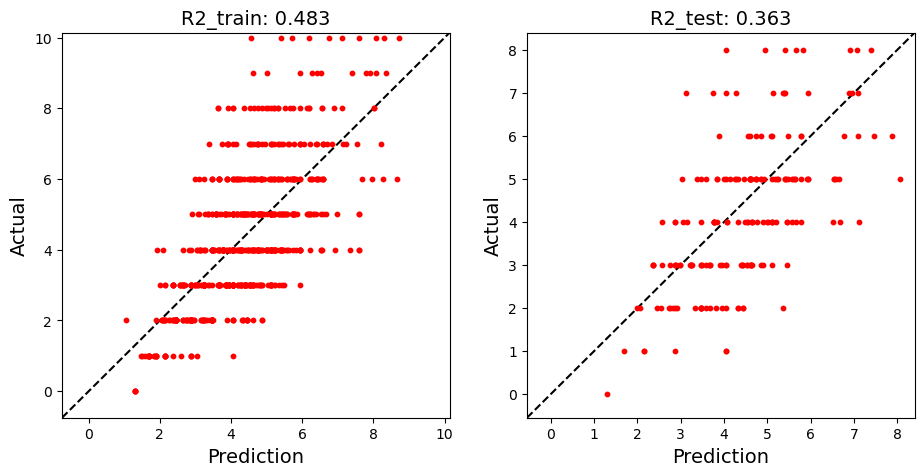


Position:  LB.csv
Epoch 1/100
111/111 [==============================] - 1s 1ms/step - loss: 15.3701
Epoch 2/100
111/111 [==============================] - 0s 1ms/step - loss: 11.6832
Epoch 3/100
111/111 [==============================] - 0s 1ms/step - loss: 8.8539
Epoch 4/100
111/111 [==============================] - 0s 1ms/step - loss: 6.8227
Epoch 5/100
111/111 [==============================] - 0s 1ms/step - loss: 5.4693
Epoch 6/100
111/111 [==============================] - 0s 1ms/step - loss: 4.7791
Epoch 7/100
111/111 [==============================] - 0s 1ms/step - loss: 4.4364
Epoch 8/100
111/111 [==============================] - 0s 1ms/step - loss: 4.2588
Epoch 9/100
111/111 [==============================] - 0s 1ms/step - loss: 4.1407
Epoch 10/100
111/111 [==============================] - 0s 1ms/step - loss: 4.0422
Epoch 11/100
111/111 [==============================] - 0s 1ms/step - loss: 3.9521
Epoch 12/100
111/111 [==============================] - 0s 1ms/step - loss:

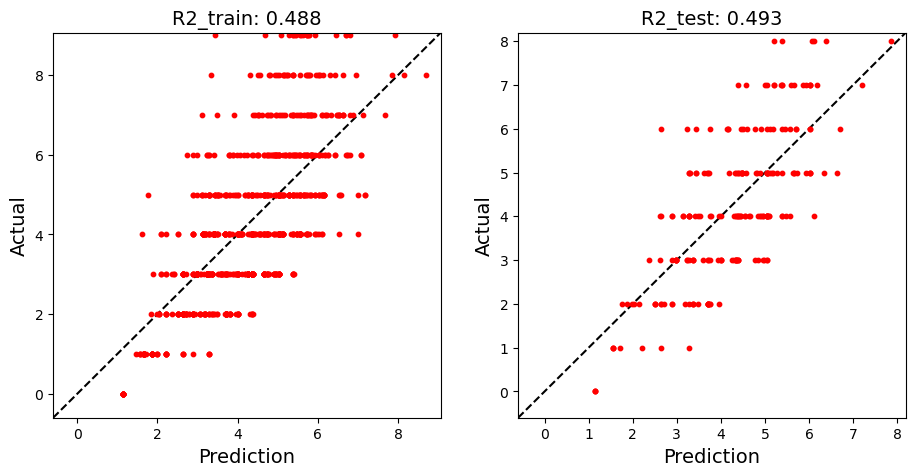


Position:  LW.csv
Epoch 1/100
71/71 [==============================] - 0s 1ms/step - loss: 31.4431
Epoch 2/100
71/71 [==============================] - 0s 1ms/step - loss: 27.6290
Epoch 3/100
71/71 [==============================] - 0s 1ms/step - loss: 24.2601
Epoch 4/100
71/71 [==============================] - 0s 1ms/step - loss: 21.3426
Epoch 5/100
71/71 [==============================] - 0s 1ms/step - loss: 18.7280
Epoch 6/100
71/71 [==============================] - 0s 1ms/step - loss: 16.4473
Epoch 7/100
71/71 [==============================] - 0s 1ms/step - loss: 14.5212
Epoch 8/100
71/71 [==============================] - 0s 1ms/step - loss: 12.8108
Epoch 9/100
71/71 [==============================] - 0s 1ms/step - loss: 11.3323
Epoch 10/100
71/71 [==============================] - 0s 1ms/step - loss: 10.0360
Epoch 11/100
71/71 [==============================] - 0s 1ms/step - loss: 8.8664
Epoch 12/100
71/71 [==============================] - 0s 1ms/step - loss: 7.7964
Epoch 13

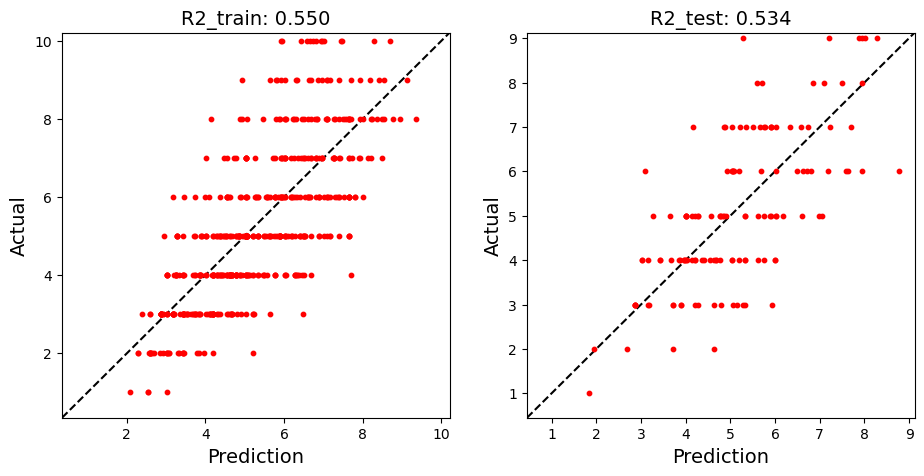


Position:  P.csv
Epoch 1/100
77/77 [==============================] - 0s 1ms/step - loss: 23.9833
Epoch 2/100
77/77 [==============================] - 0s 1ms/step - loss: 19.3886
Epoch 3/100
77/77 [==============================] - 0s 1ms/step - loss: 15.2444
Epoch 4/100
77/77 [==============================] - 0s 1ms/step - loss: 11.6807
Epoch 5/100
77/77 [==============================] - 0s 1ms/step - loss: 8.8124
Epoch 6/100
77/77 [==============================] - 0s 998us/step - loss: 6.6078
Epoch 7/100
77/77 [==============================] - 0s 1ms/step - loss: 4.9583
Epoch 8/100
77/77 [==============================] - 0s 1ms/step - loss: 3.8469
Epoch 9/100
77/77 [==============================] - 0s 1ms/step - loss: 3.1059
Epoch 10/100
77/77 [==============================] - 0s 1ms/step - loss: 2.6705
Epoch 11/100
77/77 [==============================] - 0s 1ms/step - loss: 2.4287
Epoch 12/100
77/77 [==============================] - 0s 1ms/step - loss: 2.2867
Epoch 13/100


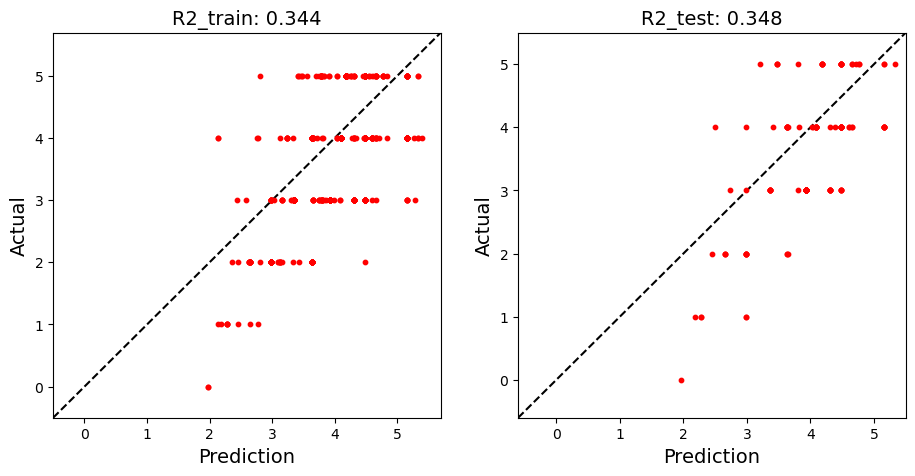


Position:  RB.csv
Epoch 1/100
83/83 [==============================] - 0s 1ms/step - loss: 37.0150
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 31.4379
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 26.8668
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 23.0317
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 19.7860
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 17.0109
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 14.6809
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 12.6787
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 10.9222
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 9.4844
Epoch 11/100
83/83 [==============================] - 0s 1ms/step - loss: 8.3785
Epoch 12/100
83/83 [==============================] - 0s 1ms/step - loss: 7.5222
Epoch 13/

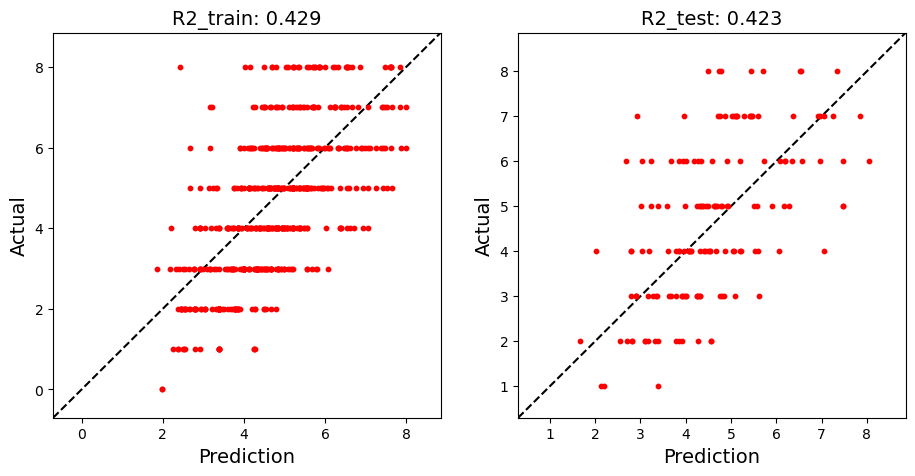


Position:  RW.csv
Epoch 1/100
73/73 [==============================] - 0s 1ms/step - loss: 51.9837
Epoch 2/100
73/73 [==============================] - 0s 1ms/step - loss: 46.1107
Epoch 3/100
73/73 [==============================] - 0s 1ms/step - loss: 40.6297
Epoch 4/100
73/73 [==============================] - 0s 1ms/step - loss: 35.7182
Epoch 5/100
73/73 [==============================] - 0s 1ms/step - loss: 31.4287
Epoch 6/100
73/73 [==============================] - 0s 991us/step - loss: 27.7580
Epoch 7/100
73/73 [==============================] - 0s 997us/step - loss: 24.6942
Epoch 8/100
73/73 [==============================] - 0s 983us/step - loss: 21.9408
Epoch 9/100
73/73 [==============================] - 0s 970us/step - loss: 19.4742
Epoch 10/100
73/73 [==============================] - 0s 956us/step - loss: 17.2007
Epoch 11/100
73/73 [==============================] - 0s 1ms/step - loss: 15.1357
Epoch 12/100
73/73 [==============================] - 0s 1ms/step - loss: 13.2

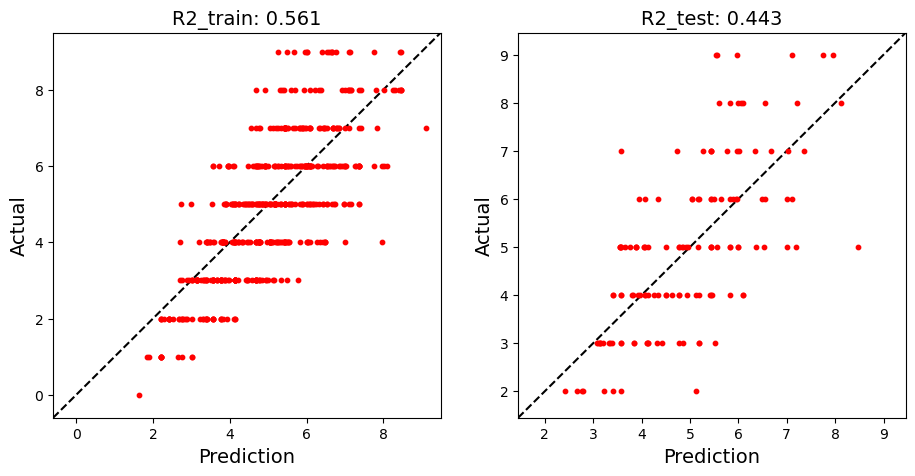

In [10]:
for i in os.listdir('databarumean/'):
    print('Position: ', i.split(',')[0])
    training_modelacc('databarumean/'+i)
    print('')

Position:  CB.csv
Epoch 1/100
98/98 [==============================] - 0s 1ms/step - loss: 10.0898
Epoch 2/100
98/98 [==============================] - 0s 1ms/step - loss: 7.3561
Epoch 3/100
98/98 [==============================] - 0s 1ms/step - loss: 5.6969
Epoch 4/100
98/98 [==============================] - 0s 1ms/step - loss: 4.9778
Epoch 5/100
98/98 [==============================] - 0s 1ms/step - loss: 4.6747
Epoch 6/100
98/98 [==============================] - 0s 1ms/step - loss: 4.4913
Epoch 7/100
98/98 [==============================] - 0s 1ms/step - loss: 4.3438
Epoch 8/100
98/98 [==============================] - 0s 1ms/step - loss: 4.2038
Epoch 9/100
98/98 [==============================] - 0s 1ms/step - loss: 4.0879
Epoch 10/100
98/98 [==============================] - 0s 1ms/step - loss: 3.9849
Epoch 11/100
98/98 [==============================] - 0s 1ms/step - loss: 3.8952
Epoch 12/100
98/98 [==============================] - 0s 977us/step - loss: 3.8128
Epoch 13/100
98/

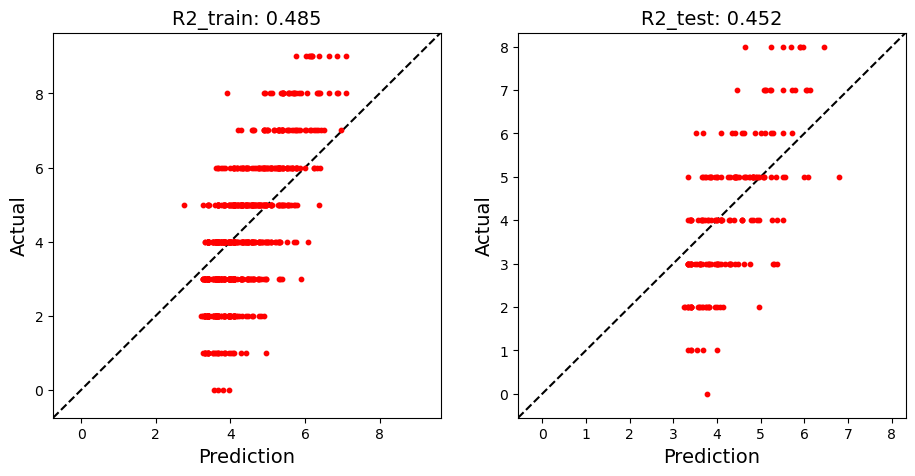


Position:  LB.csv
Epoch 1/100
111/111 [==============================] - 0s 1ms/step - loss: 10.3849
Epoch 2/100
111/111 [==============================] - 0s 1ms/step - loss: 7.3277
Epoch 3/100
111/111 [==============================] - 0s 997us/step - loss: 5.5039
Epoch 4/100
111/111 [==============================] - 0s 1ms/step - loss: 4.6556
Epoch 5/100
111/111 [==============================] - 0s 1ms/step - loss: 4.3508
Epoch 6/100
111/111 [==============================] - 0s 1ms/step - loss: 4.2396
Epoch 7/100
111/111 [==============================] - 0s 1ms/step - loss: 4.1698
Epoch 8/100
111/111 [==============================] - 0s 1ms/step - loss: 4.1040
Epoch 9/100
111/111 [==============================] - 0s 1ms/step - loss: 4.0487
Epoch 10/100
111/111 [==============================] - 0s 1ms/step - loss: 4.0002
Epoch 11/100
111/111 [==============================] - 0s 1ms/step - loss: 3.9539
Epoch 12/100
111/111 [==============================] - 0s 954us/step - lo

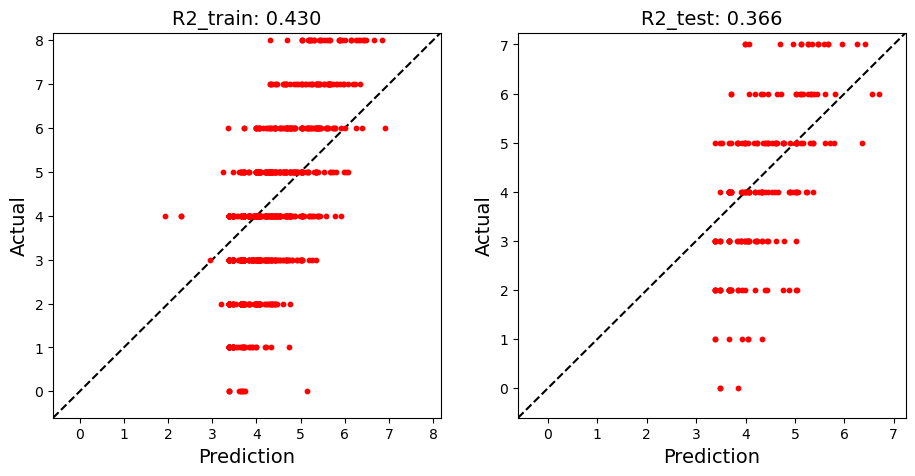


Position:  LW.csv
Epoch 1/100
71/71 [==============================] - 0s 1ms/step - loss: 35.4655
Epoch 2/100
71/71 [==============================] - 0s 1ms/step - loss: 29.6340
Epoch 3/100
71/71 [==============================] - 0s 1ms/step - loss: 24.6402
Epoch 4/100
71/71 [==============================] - 0s 983us/step - loss: 20.3577
Epoch 5/100
71/71 [==============================] - 0s 955us/step - loss: 16.8511
Epoch 6/100
71/71 [==============================] - 0s 949us/step - loss: 14.0254
Epoch 7/100
71/71 [==============================] - 0s 977us/step - loss: 11.7609
Epoch 8/100
71/71 [==============================] - 0s 984us/step - loss: 9.9737
Epoch 9/100
71/71 [==============================] - 0s 1ms/step - loss: 8.5678
Epoch 10/100
71/71 [==============================] - 0s 983us/step - loss: 7.4224
Epoch 11/100
71/71 [==============================] - 0s 983us/step - loss: 6.5515
Epoch 12/100
71/71 [==============================] - 0s 1ms/step - loss: 5.98

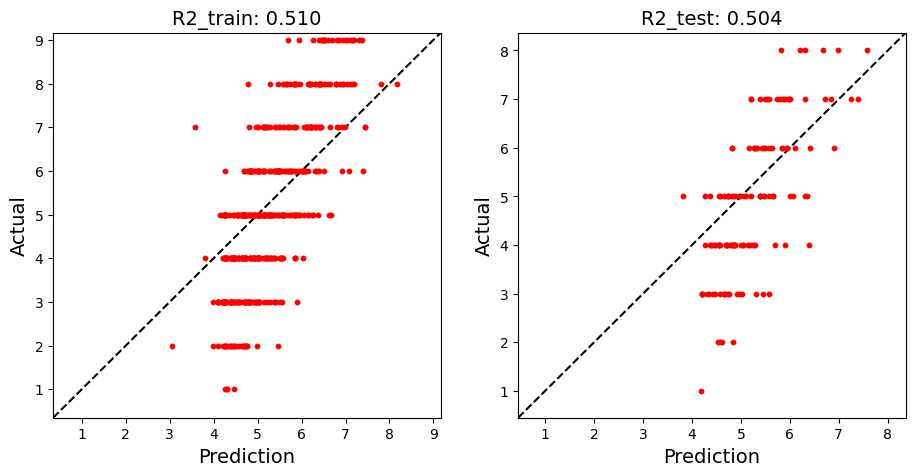


Position:  P.csv
Epoch 1/100
77/77 [==============================] - 1s 1ms/step - loss: 22.4952
Epoch 2/100
77/77 [==============================] - 0s 1ms/step - loss: 17.6893
Epoch 3/100
77/77 [==============================] - 0s 1ms/step - loss: 13.5671
Epoch 4/100
77/77 [==============================] - 0s 1ms/step - loss: 10.2126
Epoch 5/100
77/77 [==============================] - 0s 1ms/step - loss: 7.6843
Epoch 6/100
77/77 [==============================] - 0s 1ms/step - loss: 5.7838
Epoch 7/100
77/77 [==============================] - 0s 1ms/step - loss: 4.4305
Epoch 8/100
77/77 [==============================] - 0s 1ms/step - loss: 3.5529
Epoch 9/100
77/77 [==============================] - 0s 1ms/step - loss: 2.9614
Epoch 10/100
77/77 [==============================] - 0s 1ms/step - loss: 2.6629
Epoch 11/100
77/77 [==============================] - 0s 1ms/step - loss: 2.5013
Epoch 12/100
77/77 [==============================] - 0s 1ms/step - loss: 2.4297
Epoch 13/100
77

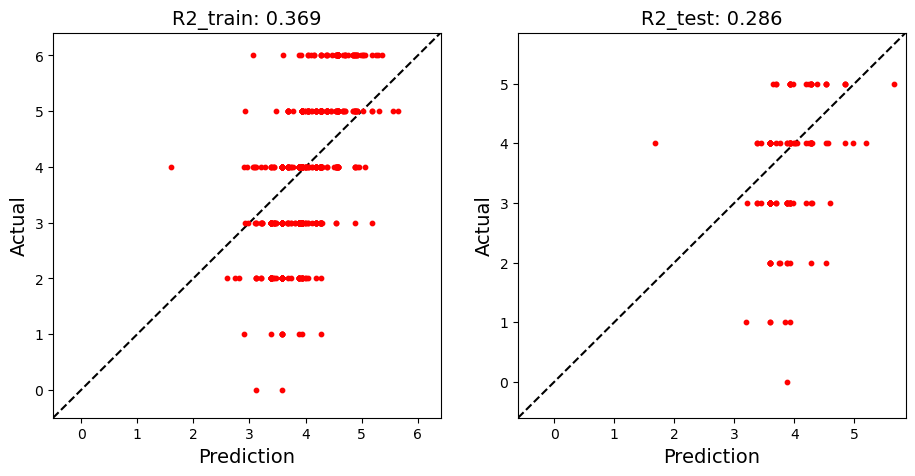


Position:  RB.csv
Epoch 1/100
83/83 [==============================] - 0s 1ms/step - loss: 37.3763
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 30.2918
Epoch 3/100
83/83 [==============================] - 0s 957us/step - loss: 24.2560
Epoch 4/100
83/83 [==============================] - 0s 935us/step - loss: 19.3174
Epoch 5/100
83/83 [==============================] - 0s 979us/step - loss: 15.3544
Epoch 6/100
83/83 [==============================] - 0s 997us/step - loss: 12.4671
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 10.2934
Epoch 8/100
83/83 [==============================] - 0s 924us/step - loss: 8.6944
Epoch 9/100
83/83 [==============================] - 0s 912us/step - loss: 7.5086
Epoch 10/100
83/83 [==============================] - 0s 924us/step - loss: 6.7119
Epoch 11/100
83/83 [==============================] - 0s 912us/step - loss: 6.1078
Epoch 12/100
83/83 [==============================] - 0s 985us/step - loss: 

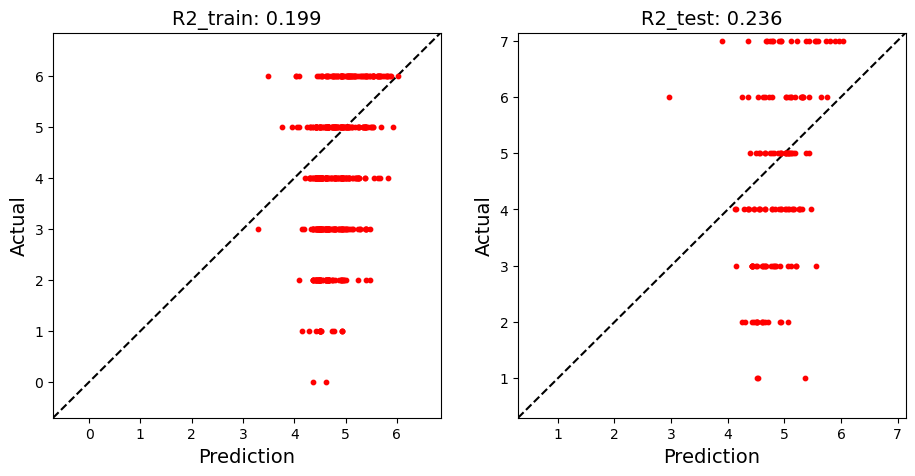


Position:  RW.csv
Epoch 1/100
73/73 [==============================] - 0s 1ms/step - loss: 45.8687
Epoch 2/100
73/73 [==============================] - 0s 1ms/step - loss: 38.6139
Epoch 3/100
73/73 [==============================] - 0s 1ms/step - loss: 32.3066
Epoch 4/100
73/73 [==============================] - 0s 1ms/step - loss: 27.0018
Epoch 5/100
73/73 [==============================] - 0s 970us/step - loss: 22.5574
Epoch 6/100
73/73 [==============================] - 0s 914us/step - loss: 18.7908
Epoch 7/100
73/73 [==============================] - 0s 1ms/step - loss: 15.6844
Epoch 8/100
73/73 [==============================] - 0s 914us/step - loss: 13.2603
Epoch 9/100
73/73 [==============================] - 0s 942us/step - loss: 11.2879
Epoch 10/100
73/73 [==============================] - 0s 1ms/step - loss: 9.7443
Epoch 11/100
73/73 [==============================] - 0s 1ms/step - loss: 8.5233
Epoch 12/100
73/73 [==============================] - 0s 1ms/step - loss: 7.5850
E

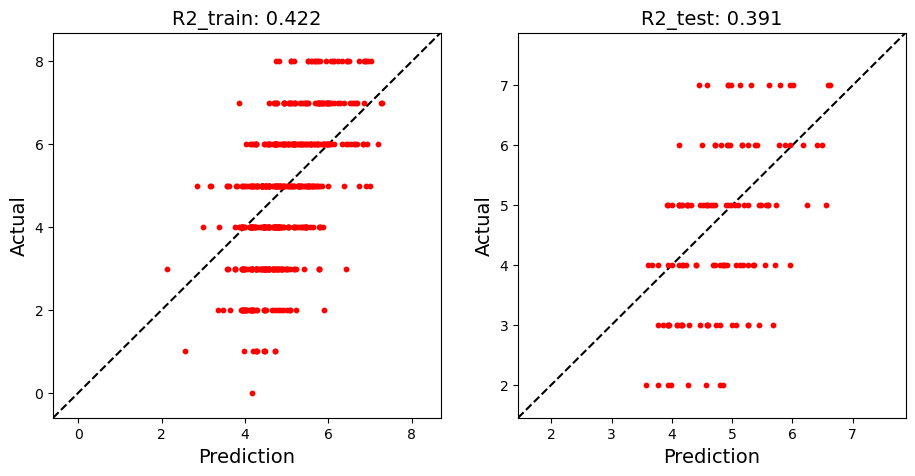

In [11]:
for i in os.listdir('databarumean/'):
    print('Position: ', i.split(',')[0])
    training_modelshot('databarumean/'+i)
    print('')